In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

#load features dataset
pd_speech_features = pd.read_csv("https://raw.githubusercontent.com/dcleres/Parkinson_Disease_ML/master/pd_speech_features.csv", header=1)
pd_speech_features

#group by gender
pd_speech_features_female, pd_speech_features_male = [x for _, x in pd_speech_features.groupby(pd_speech_features['gender'])]


In [ ]:
pd_speech_features_male

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
6,2,1,0.76095,0.62145,0.54543,322,321,0.005991,0.000107,0.00222,...,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
7,2,1,0.83671,0.62079,0.51179,318,317,0.006074,0.000136,0.00282,...,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,248,1,0.15273,0.69326,0.58112,348,346,0.005532,0.001452,0.00359,...,6.0657,3.1588,2.9695,2.5653,2.3974,2.4948,5.7007,8.1208,2.9888,1
746,248,1,0.83110,0.67512,0.42389,347,346,0.005557,0.001413,0.00313,...,3.5398,3.4060,2.5200,2.2957,2.6990,3.2788,3.0250,2.8945,2.7425,1
747,249,1,0.85141,0.78231,0.42890,343,342,0.005628,0.000034,0.00077,...,117.6949,97.7565,52.4362,14.2118,8.5630,13.5210,17.9862,19.3200,16.7182,1
748,249,1,0.79645,0.78772,0.36342,340,339,0.005686,0.000050,0.00084,...,81.7657,46.9118,8.7211,3.8029,3.5360,3.9038,3.5144,4.6629,3.2192,1


In [ ]:
pd_speech_features_female

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
5,1,0,0.50780,0.78744,0.65451,226,221,0.007631,0.002696,0.00783,...,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
9,3,0,0.85302,0.62247,0.54855,493,492,0.003910,0.000040,0.00075,...,1.6796,2.0474,2.8117,3.5070,3.2727,3.8415,3.9439,5.8807,38.7211,1
10,3,0,0.80657,0.67256,0.61745,488,487,0.003956,0.000054,0.00083,...,1.6542,1.8437,2.6004,3.4029,2.9788,2.5809,2.7727,2.8233,2.6381,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


# **Data PreProcessing**

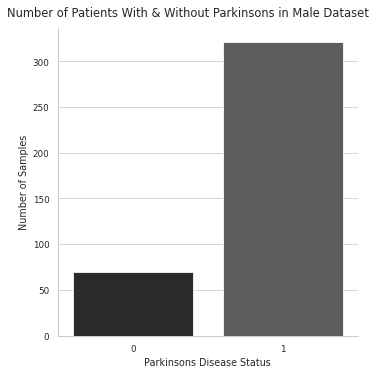

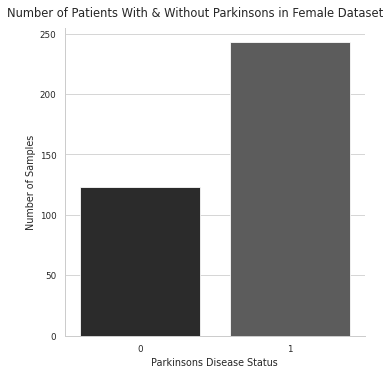

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('Greys_r')
a = sns.catplot(x='class', data=pd_speech_features_male, kind='count')
a.fig.suptitle('Number of Patients With & Without Parkinsons in Male Dataset', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Parkinsons Disease Status')
plt.show()

sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('Greys_r')
a = sns.catplot(x='class', data=pd_speech_features_female, kind='count')
a.fig.suptitle('Number of Patients With & Without Parkinsons in Female Dataset', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Parkinsons Disease Status')
plt.show()


In [ ]:
#feature extraction
#based on the paper the TQWT features were removed, I will be doing the same so that I can compare my calculated metrics to the ones reported in the paper
#print(pd_speech_features_male.loc[:,'class'])
#pd_male_class = pd_speech_features_male[pd_speech_features_male.columns[-1]]
pd_male_class = pd_speech_features_male['class']
#print(pd_male_class)
pd_female_class = pd_speech_features_female['class']

pd_speech_features_male_no_tqwt = pd_speech_features_male[pd_speech_features_male.columns[0: -433]]
pd_speech_features_male_no_tqwt = pd_speech_features_male_no_tqwt.join(pd_male_class)
print(pd_speech_features_male_no_tqwt.shape)
pd_speech_features_female_no_tqwt = pd_speech_features_female[pd_speech_features_female.columns[0: -433]]
pd_speech_features_female_no_tqwt = pd_speech_features_female_no_tqwt.join(pd_female_class)
#pd_speech_features_female_no_tqwt.head()
print(pd_speech_features_female_no_tqwt.shape)

#print(pd_speech_features_male_no_tqwt.loc[:,'class'])


(390, 323)
(366, 323)


In [ ]:
#preprocessing the data
#data cleaning
#referred to lab 3 & 5 to clean the data
def inds_nans(df):
    inds = df.isna().any(axis=1)
    print('Found {} rows that had NaN values.'.format(inds.sum()))
    return inds

def inds_dups(df):
    inds = df.duplicated()
    print('Found {} rows that were duplicates.'.format(inds.sum()))
    return inds

def inds_outliers(df):
    #remove outliers for columns with numeric values
    #df = df.loc[:,['age','capital-gain', 'capital-loss', 'hours-per-week']]
    df = df.drop(['id', 'gender','class'], axis=1)
    Z = (df-df.mean())/df.std()
    inlier_inds = ((Z > -3).sum(axis=1)==320) & ((Z <= 3).sum(axis=1)==320)
    #print(Z > -3)
    # The outliers are the inverse boolean values of the above
    outlier_inds = ~inlier_inds
    print('Found {} rows that were outliers.'.format(outlier_inds.sum()))
    return outlier_inds

# Select only the rows at index locations that were not nans, duplicates or outliers
print(pd_speech_features_male_no_tqwt.shape)
print(pd_speech_features_female_no_tqwt.shape)
# data_clean_male = pd_speech_features_male_no_tqwt.loc[~((inds_nans(pd_speech_features_male_no_tqwt) | inds_dups(pd_speech_features_male_no_tqwt)) | inds_outliers(pd_speech_features_male_no_tqwt)),:]
# data_clean_female = pd_speech_features_female_no_tqwt.loc[~((inds_nans(pd_speech_features_female_no_tqwt) | inds_dups(pd_speech_features_female_no_tqwt)) | inds_outliers(pd_speech_features_female_no_tqwt)),:]
#data normalization
from sklearn import preprocessing
#referred to lab 3 & lab 9
#data standardization
dropColumns = ["id","gender",'class']
#data_clean_male_std = data_clean_male.iloc[:,2:322] #drop id and gender columns to prevent them from being standardized
pd_speech_features_male_no_tqwt.iloc[:,2:322] = (pd_speech_features_male_no_tqwt.iloc[:,2:322] - pd_speech_features_male_no_tqwt.iloc[:,2:322].mean(axis=0)) / pd_speech_features_male_no_tqwt.iloc[:,2:322].std(axis=0)
pd_speech_features_female_no_tqwt.iloc[:,2:322] = (pd_speech_features_female_no_tqwt.iloc[:,2:322] - pd_speech_features_female_no_tqwt.iloc[:,2:322].mean(axis=0)) / pd_speech_features_female_no_tqwt.iloc[:,2:322].std(axis=0)



(390, 323)
(366, 323)


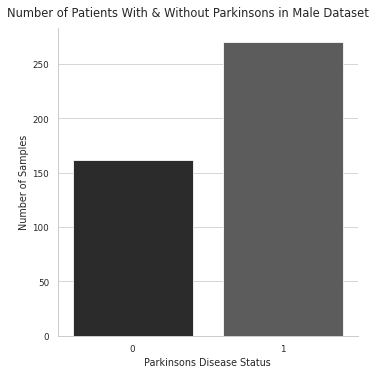

In [ ]:
#split into training and testing
#since there's 3 voice sample recorded per person, the train and test will be split by id
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=.15, n_splits=1, random_state = 0) #use number of folds in n-splits
split = splitter.split(pd_speech_features_male_no_tqwt, groups=pd_speech_features_male_no_tqwt['id'])
train_inds, test_inds = next(split)

trainMale = pd_speech_features_male_no_tqwt.iloc[train_inds]
testMale = pd_speech_features_male_no_tqwt.iloc[test_inds]

splitter = GroupShuffleSplit(test_size=.15, n_splits=1, random_state = 0)
split = splitter.split(pd_speech_features_female_no_tqwt, groups=pd_speech_features_female_no_tqwt['id'])
train_inds, test_inds = next(split)

trainFemale = pd_speech_features_female_no_tqwt.iloc[train_inds]
testFemale = pd_speech_features_female_no_tqwt.iloc[test_inds]

X_train_male = trainMale.drop(['class'], axis = 1)
X_test_male = testMale.drop(['class'], axis = 1)
y_train_male = trainMale['class']
y_test_male = testMale['class']

X_train_female = trainFemale.drop(['class'], axis = 1)
X_test_female = testFemale.drop(['class'], axis = 1)
y_train_female = trainFemale['class']
y_test_female = testFemale['class']

#Since the male dataset is so unbalance, going to oversample the minority class
from sklearn.utils import resample
combo = pd.concat([X_train_male, y_train_male], axis=1)

parkinson = combo.loc[combo['class'] == 1]
not_parkinson = combo.loc[combo['class'] == 0]


# upsample minority
upsampled_minority_class = resample(not_parkinson,
                          replace=True,
                          n_samples=162, # scaled based on female data
                          random_state=0)

# combine
upsampled = pd.concat([parkinson, upsampled_minority_class])
y_train_male = upsampled.loc[:,'class']
X_train_male = upsampled.drop(['class'], axis=1)


sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('Greys_r')
a = sns.catplot(x='class', data=upsampled, kind='count')
a.fig.suptitle('Number of Patients With & Without Parkinsons in Male Dataset', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Parkinsons Disease Status')
plt.show()


In [ ]:
print(trainMale.shape)
print(testMale.shape)
print(X_train_male.shape)
print(y_train_male.shape)
col_one_list = trainMale['id'].tolist()
print(col_one_list)
col_two_list = trainMale['id'].tolist()
print(col_two_list)
print(trainFemale.shape)
print(testFemale.shape)
#data_clean_male.loc[:,'class']

(330, 323)
(60, 323)
(432, 322)
(432,)
[0, 0, 0, 2, 2, 2, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 12, 12, 12, 15, 15, 15, 19, 19, 19, 21, 21, 21, 23, 23, 23, 26, 26, 26, 31, 31, 31, 32, 32, 32, 33, 33, 33, 36, 36, 36, 38, 38, 38, 39, 39, 39, 42, 42, 42, 43, 43, 43, 44, 44, 44, 47, 47, 47, 48, 48, 48, 51, 51, 51, 54, 54, 54, 55, 55, 55, 58, 58, 58, 61, 61, 61, 63, 63, 63, 64, 64, 64, 65, 65, 65, 71, 71, 71, 72, 72, 72, 73, 73, 73, 74, 74, 74, 78, 78, 78, 81, 81, 81, 85, 85, 85, 86, 86, 86, 88, 88, 88, 91, 91, 91, 92, 92, 92, 93, 93, 93, 95, 95, 95, 96, 96, 96, 98, 98, 98, 99, 99, 99, 100, 100, 100, 101, 101, 101, 104, 104, 104, 105, 105, 105, 106, 106, 106, 108, 108, 108, 110, 110, 110, 111, 111, 111, 114, 114, 114, 115, 115, 115, 116, 116, 116, 124, 124, 124, 126, 126, 126, 127, 127, 127, 129, 129, 129, 130, 130, 130, 134, 134, 134, 138, 138, 138, 139, 139, 139, 141, 141, 141, 142, 142, 142, 143, 143, 143, 145, 145, 145, 146, 146, 146, 150, 150, 150, 152, 152, 152, 153, 153, 153, 154, 154,

# **Feature Selection: Recursive Feature Elimination**

RFE + Random Forest Classification:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
classifier = RandomForestClassifier(n_estimators=34, max_depth=47, random_state=0)
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(classifier, n_features_to_select=n_features_to_select)
rfe.fit(X_train_male.drop(['id'], axis = 1), y_train_male)
from operator import itemgetter
features = X_train_male.columns.to_list()
print("Male feature ranking:")
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

Male feature ranking:
1 apq5Shimmer
2 std_MFCC_12th_coef
3 PPE
4 std_4th_delta_delta
5 det_LT_entropy_log_1_coef
6 std_5th_delta
7 mean_MFCC_5th_coef
8 det_entropy_log_8_coef
9 meanIntensity
10 locShimmer
11 mean_12th_delta_delta
12 Ed2_10_coef
13 Ed2_8_coef
14 std_4th_delta
15 det_entropy_log_7_coef
16 std_12th_delta
17 VFER_SNR_TKEO
18 f4
19 GQ_prc5_95
20 std_MFCC_3rd_coef
21 det_LT_entropy_log_10_coef
22 std_6th_delta_delta
23 mean_MFCC_3rd_coef
24 ddpJitter
25 mean_MFCC_1st_coef
26 std_6th_delta
27 Ed_1_coef
28 std_MFCC_4th_coef
29 det_entropy_shannon_10_coef
30 std_5th_delta_delta
31 apq11Shimmer
32 det_LT_entropy_log_7_coef
33 det_LT_entropy_shannon_3_coef
34 det_LT_entropy_shannon_2_coef
35 f1
36 mean_4th_delta
37 det_LT_TKEO_mean_10_coef
38 mean_MFCC_12th_coef
39 mean_1st_delta_delta
40 GNE_std
41 mean_3rd_delta
42 std_7th_delta
43 mean_MFCC_0th_coef
44 mean_5th_delta
45 VFER_NSR_TKEO
46 std_3rd_delta_delta
47 GNE_SNR_SEO
48 GNE_NSR_TKEO
49 std_MFCC_5th_coef
50 IMF_SNR_SEO
51 b

In [ ]:
classifierMale = RandomForestClassifier(n_estimators=34, max_depth=47, random_state=0)
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 50
rfeMale = RFE(classifierMale, n_features_to_select=n_features_to_select)

X_train_rfe_male = rfeMale.fit_transform(X_train_male.drop(['id'], axis = 1), y_train_male)
X_test_rfe_male = rfeMale.transform(X_test_male.drop(['id'], axis = 1))
# X_train_rfe = rfe.fit_transform(X_train,y_train)
# X_test_rfe = rfe.transform(X_test)
from operator import itemgetter
featuresMale = X_train_male.columns.to_list()
print("Male feature Top 50 ranking:")
for x, y in (sorted(zip(rfeMale.ranking_ , featuresMale), key=itemgetter(0))):
    print(x, y)

Male feature Top 50 ranking:
1 PPE
1 ddpJitter
1 locShimmer
1 apq5Shimmer
1 apq11Shimmer
1 meanIntensity
1 f1
1 f4
1 GQ_prc5_95
1 GNE_std
1 GNE_SNR_SEO
1 GNE_NSR_TKEO
1 VFER_SNR_TKEO
1 VFER_NSR_TKEO
1 IMF_SNR_SEO
1 mean_MFCC_0th_coef
1 mean_MFCC_1st_coef
1 mean_MFCC_3rd_coef
1 mean_MFCC_5th_coef
1 mean_MFCC_12th_coef
1 mean_3rd_delta
1 mean_4th_delta
1 mean_5th_delta
1 mean_1st_delta_delta
1 mean_12th_delta_delta
1 std_MFCC_3rd_coef
1 std_MFCC_4th_coef
1 std_MFCC_5th_coef
1 std_MFCC_12th_coef
1 std_4th_delta
1 std_5th_delta
1 std_6th_delta
1 std_7th_delta
1 std_12th_delta
1 std_3rd_delta_delta
1 std_4th_delta_delta
1 std_5th_delta_delta
1 std_6th_delta_delta
1 Ed_1_coef
1 det_entropy_shannon_10_coef
1 det_entropy_log_7_coef
1 det_entropy_log_8_coef
1 Ed2_8_coef
1 Ed2_10_coef
1 det_LT_entropy_shannon_2_coef
1 det_LT_entropy_shannon_3_coef
1 det_LT_entropy_log_1_coef
1 det_LT_entropy_log_7_coef
1 det_LT_entropy_log_10_coef
1 det_LT_TKEO_mean_10_coef
2 b1
3 det_LT_TKEO_mean_2_coef
4 std_1

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# #maleRFpredTrain = rfeMale.predict(X_train_male.drop(['id'], axis = 1))
# maleRFpredTest = rfeMale.predict(X_test_male.drop(['id'], axis = 1))
# #print(accuracy_score(y_train_male, maleRFpredTrain))
# print(accuracy_score(y_test_male, maleRFpredTest))
# #print(classification_report(y_train_male, maleRFpredTrain, target_names="FT"))
# print(classification_report(y_test_male, maleRFpredTest, target_names="01"))

In [ ]:
# X_train_rfe_male = pd.DataFrame(X_train_rfe_male)
# X_test_rfe_male = pd.DataFrame(X_test_rfe_male)

# clfMale = RandomForestClassifier(n_estimators=34, max_depth=47, random_state=0)
# clfMale.fit(X_train_rfe_male, y_train_male)
# # Y_predTrain = clfMale.predict(X_train_rfe_male)
# # Y_predTest = clfMale.predict(X_test_rfe_male)
# maleRFpredTrain = clfMale.predict(X_train_rfe_male)
# maleRFpredTest = clfMale.predict(X_test_rfe_male)
# print(accuracy_score(y_train_male, maleRFpredTrain))
# print(accuracy_score(y_test_male, maleRFpredTest))
# print(classification_report(y_train_male, maleRFpredTrain, target_names="FT"))
# print(classification_report(y_test_male, maleRFpredTest, target_names="01"))

In [ ]:
classifier = RandomForestClassifier(n_estimators=34, max_depth=47, random_state=0)
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(classifier, n_features_to_select=n_features_to_select)
rfe.fit(X_train_female.drop(['id'], axis = 1), y_train_female)
from operator import itemgetter
features = X_train_female.columns.to_list()
print("Female feature ranking:")
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

Female feature ranking:
1 mean_MFCC_1st_coef
2 std_12th_delta
3 std_6th_delta_delta
4 std_MFCC_12th_coef
5 app_entropy_log_9_coef
6 mean_MFCC_2nd_coef
7 locPctJitter
8 std_MFCC_11th_coef
9 std_5th_delta_delta
10 maxIntensity
11 GNE_NSR_TKEO
12 mean_Log_energy
13 f2
14 app_LT_TKEO_mean_1_coef
15 std_9th_delta_delta
16 meanHarmToNoiseHarmonicity
17 stdDevPeriodPulses
18 app_LT_TKEO_mean_3_coef
19 mean_MFCC_5th_coef
20 meanIntensity
21 VFER_NSR_SEO
22 VFER_entropy
23 mean_MFCC_9th_coef
24 std_8th_delta_delta
25 ppq5Jitter
26 IMF_SNR_SEO
27 GQ_prc5_95
28 std_3rd_delta
29 mean_12th_delta_delta
30 minIntensity
31 std_9th_delta
32 app_det_TKEO_mean_5_coef
33 mean_delta_delta_0th
34 std_6th_delta
35 mean_MFCC_4th_coef
36 std_MFCC_8th_coef
37 app_entropy_shannon_10_coef
38 mean_2nd_delta
39 std_10th_delta_delta
40 std_Log_energy
41 std_7th_delta
42 VFER_SNR_SEO
43 locAbsJitter
44 VFER_SNR_TKEO
45 app_LT_TKEO_mean_5_coef
46 det_TKEO_std_3_coef
47 mean_4th_delta
48 mean_7th_delta_delta
49 app_ent

In [ ]:
classifierFemale = RandomForestClassifier(n_estimators=34, max_depth=47, random_state=0)
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 50
rfeFemale = RFE(classifierFemale, n_features_to_select=n_features_to_select)
#rfeFemale.fit(X_train_female.drop(['id'], axis = 1), y_train_female)
X_train_rfe_female = rfeFemale.fit_transform(X_train_female.drop(['id'], axis = 1), y_train_female)
X_test_rfe_female = rfeFemale.transform(X_test_female.drop(['id'], axis = 1))
from operator import itemgetter
featuresFemale = X_train_female.columns.to_list()
print("Female feature Top 50 ranking:")
for x, y in (sorted(zip(rfeFemale.ranking_ , featuresFemale), key=itemgetter(0))):
    print(x, y)

Female feature Top 50 ranking:
1 stdDevPeriodPulses
1 locPctJitter
1 locAbsJitter
1 ppq5Jitter
1 meanHarmToNoiseHarmonicity
1 minIntensity
1 maxIntensity
1 meanIntensity
1 f2
1 GQ_prc5_95
1 GNE_NSR_TKEO
1 VFER_entropy
1 VFER_SNR_TKEO
1 VFER_SNR_SEO
1 VFER_NSR_SEO
1 IMF_SNR_SEO
1 mean_Log_energy
1 mean_MFCC_1st_coef
1 mean_MFCC_2nd_coef
1 mean_MFCC_4th_coef
1 mean_MFCC_5th_coef
1 mean_MFCC_9th_coef
1 mean_2nd_delta
1 mean_4th_delta
1 mean_delta_delta_0th
1 mean_7th_delta_delta
1 mean_12th_delta_delta
1 std_Log_energy
1 std_MFCC_8th_coef
1 std_MFCC_11th_coef
1 std_MFCC_12th_coef
1 std_3rd_delta
1 std_6th_delta
1 std_7th_delta
1 std_9th_delta
1 std_12th_delta
1 std_5th_delta_delta
1 std_6th_delta_delta
1 std_8th_delta_delta
1 std_9th_delta_delta
1 std_10th_delta_delta
1 det_entropy_log_7_coef
1 det_TKEO_std_3_coef
1 app_entropy_shannon_5_coef
1 app_entropy_shannon_10_coef
1 app_entropy_log_9_coef
1 app_det_TKEO_mean_5_coef
1 app_LT_TKEO_mean_1_coef
1 app_LT_TKEO_mean_3_coef
1 app_LT_TKEO_

In [ ]:


# femaleRFpredTest = rfeFemale.predict(X_test_female.drop(['id'], axis = 1))
# print(accuracy_score(y_test_female, femaleRFpredTest))
# print(classification_report(y_test_female, femaleRFpredTest, target_names="01"))

# **Classification**

**Random Forest Classifier:**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#feature reduced train & test set for male data
X_train_rfe_male = pd.DataFrame(X_train_rfe_male)
X_test_rfe_male = pd.DataFrame(X_test_rfe_male)

#feature reduced train & test set for female data
X_train_rfe_female = pd.DataFrame(X_train_rfe_female)
X_test_rfe_female = pd.DataFrame(X_test_rfe_female)

In [ ]:
#took too long, hit nearly 2hrs, gridsearch -> halvinggridsearch
param_grid = {'n_estimators': list(range(1, 100)),
              'max_depth': list(range(1, 50))
             }
rfcMaleTest = RandomForestClassifier()
rfcFemaleTest = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

clfMale = HalvingGridSearchCV(rfcMaleTest, param_grid)
clfMale.fit(X_train_rfe_male, y_train_male)
#rfc_results_male = pd.DataFrame(clfMale.cv_results_)
print("Parameter settings for RFC Male Data: %s" % clfMale.best_params_)

clfFemale = HalvingGridSearchCV(rfcFemaleTest, param_grid)
clfFemale.fit(X_train_rfe_female, y_train_female)
#rfc_results_female = pd.DataFrame(clfFemale.cv_results_)
print("Parameter settings for RFC Female Data: %s" % clfFemale.best_params_)

              precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.86      0.98      0.92        51

    accuracy                           0.85        60
   macro avg       0.68      0.55      0.55        60
weighted avg       0.81      0.85      0.81        60

0.18201783862232032


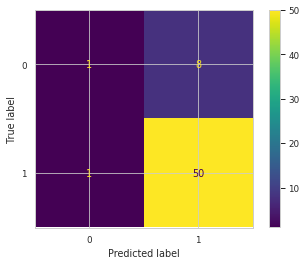

In [ ]:
from sklearn.metrics import matthews_corrcoef
#Parameter settings for RFC Male Data: {'max_depth': 49, 'n_estimators': 98}
#Parameter settings for RFC Female Data: {'max_depth': 15, 'n_estimators': 57}
rfcMale = RandomForestClassifier(n_estimators=98, max_depth=49, random_state=0)
rfcMale.fit(X_train_rfe_male, y_train_male)
# Y_predTrain = clfMale.predict(X_train_rfe_male)
# Y_predTest = clfMale.predict(X_test_rfe_male)
maleRFpredTest = rfcMale.predict(X_test_rfe_male)
print(classification_report(y_test_male, maleRFpredTest, target_names="01"))
print(matthews_corrcoef(y_test_male, maleRFpredTest))
ConfusionMatrixDisplay.from_estimator(
    rfcMale, X_test_rfe_male, y_test_male, display_labels="01", xticks_rotation="horizontal"
)

              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.90      0.94      0.92        48

    accuracy                           0.86        57
   macro avg       0.74      0.69      0.71        57
weighted avg       0.85      0.86      0.85        57

0.42433421239575275


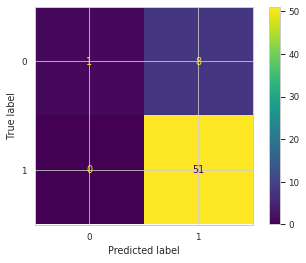

In [ ]:
rfcFemale = RandomForestClassifier(n_estimators=57, max_depth=15, random_state=0)
rfcFemale.fit(X_train_rfe_female, y_train_female)
# Y_predTrain = clfMale.predict(X_train_rfe_male)
# Y_predTest = clfMale.predict(X_test_rfe_male)
#femaleRFpredTrain = rfcFemale.predict(X_train_rfe_female)
femaleRFpredTest = rfcFemale.predict(X_test_rfe_female)
#print(accuracy_score(y_train_female, femaleRFpredTrain))
#print(accuracy_score(y_test_female, femaleRFpredTest))
#print(classification_report(y_train_female, femaleRFpredTrain, target_names="TF"))
print(classification_report(y_test_female, femaleRFpredTest, target_names="01"))
print(matthews_corrcoef(y_test_female, femaleRFpredTest))
ConfusionMatrixDisplay.from_estimator(
    rfcFemale, X_test_rfe_male, y_test_male, display_labels="01", xticks_rotation="horizontal"
)

**Naive-Bayes**

              precision    recall  f1-score   support

           0       0.18      0.22      0.20         9
           1       0.86      0.82      0.84        51

    accuracy                           0.73        60
   macro avg       0.52      0.52      0.52        60
weighted avg       0.76      0.73      0.74        60

0.04222003309207491


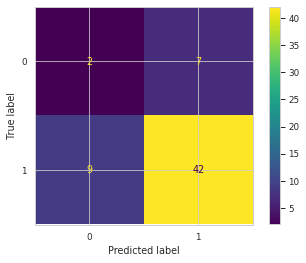

In [ ]:

from sklearn.naive_bayes import GaussianNB
gnbMale = GaussianNB()
gnbMale = gnbMale.fit(X_train_rfe_male, y_train_male)
maleGNBpredTest = gnbMale.predict(X_test_rfe_male)
print(classification_report(y_test_male, maleGNBpredTest, target_names="01"))
print(matthews_corrcoef(y_test_male, maleGNBpredTest))
ConfusionMatrixDisplay.from_estimator(
    gnbMale, X_test_rfe_male, y_test_male, display_labels="01", xticks_rotation="horizontal"
)

              precision    recall  f1-score   support

           0       0.36      1.00      0.53         9
           1       1.00      0.67      0.80        48

    accuracy                           0.72        57
   macro avg       0.68      0.83      0.66        57
weighted avg       0.90      0.72      0.76        57

0.4898979485566356


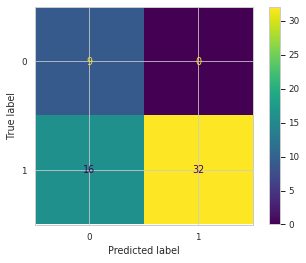

In [ ]:
gnbFemale = GaussianNB()
gnbFemale = gnbFemale.fit(X_train_rfe_female, y_train_female)
femaleGNBpredTest = gnbFemale.predict(X_test_rfe_female)
print(classification_report(y_test_female, femaleGNBpredTest, target_names="01"))
print(matthews_corrcoef(y_test_female, femaleGNBpredTest))
ConfusionMatrixDisplay.from_estimator(
    gnbFemale, X_test_rfe_female, y_test_female, display_labels="01", xticks_rotation="horizontal"
)

**K-Nearest-Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': list(range(1, 11)),
              'weights': ['uniform', 'distance'],
              'metric': ['l1', 'l2', 'cosine']
             }
knnMaleTest = KNeighborsClassifier()
knnFemaleTest = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

clfMale = GridSearchCV(knnMaleTest, param_grid)
clfMale.fit(X_train_rfe_male, y_train_male)
#rfc_results_male = pd.DataFrame(clfMale.cv_results_)
print("Parameter settings for KNN Male Data: %s" % clfMale.best_params_)

clfFemale = GridSearchCV(knnFemaleTest, param_grid)
clfFemale.fit(X_train_rfe_female, y_train_female)
#rfc_results_female = pd.DataFrame(clfFemale.cv_results_)
print("Parameter settings for KNN Female Data: %s" % clfFemale.best_params_)

Parameter settings for KNN Male Data: {'metric': 'l1', 'n_neighbors': 1, 'weights': 'uniform'}
Parameter settings for KNN Female Data: {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.94      0.92      0.93        51

    accuracy                           0.88        60
   macro avg       0.77      0.79      0.78        60
weighted avg       0.89      0.88      0.89        60

0.5636018619766345


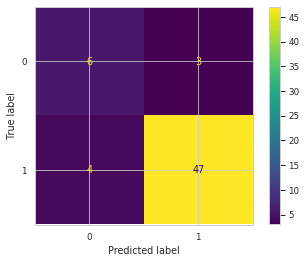

In [ ]:
# Parameter settings for KNN Male Data: {'metric': 'l1', 'n_neighbors': 1, 'weights': 'uniform'}
# Parameter settings for KNN Female Data: {'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}

knnMale = KNeighborsClassifier(metric = 'l1', n_neighbors = 1, weights = 'uniform')
knnMale.fit(X_train_rfe_male, y_train_male)
maleKNNpredTest =  knnMale.predict(X_test_rfe_male)
print(classification_report(y_test_male, maleKNNpredTest, target_names="01"))
print(matthews_corrcoef(y_test_male, maleKNNpredTest))
ConfusionMatrixDisplay.from_estimator(
    knnMale, X_test_rfe_male, y_test_male, display_labels="01", xticks_rotation="horizontal"
)

              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.90      0.92      0.91        48

    accuracy                           0.84        57
   macro avg       0.70      0.68      0.69        57
weighted avg       0.84      0.84      0.84        57

0.3790876982878728


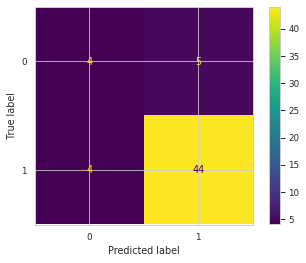

In [ ]:
knnFemale = KNeighborsClassifier(metric = 'cosine', n_neighbors = 9, weights = 'distance')
knnFemale.fit(X_train_rfe_female, y_train_female)
femaleKNNpredTest =  knnFemale.predict(X_test_rfe_female)
print(classification_report(y_test_female, femaleKNNpredTest, target_names="01"))
print(matthews_corrcoef(y_test_female, femaleKNNpredTest))
ConfusionMatrixDisplay.from_estimator(
    knnFemale, X_test_rfe_female, y_test_female, display_labels="01", xticks_rotation="horizontal"
)

**Supprt Vector Machine - Linear Kernel**

In [ ]:
from sklearn.svm import SVC
#gamma = 0.0001, C=1.0, random_state=None, tol=1e-8
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}

linSVCMaleTest = SVC()
linSVCFemaleTest = SVC()

clfMale = GridSearchCV(linSVCMaleTest, param_grid)
clfMale.fit(X_train_rfe_male, y_train_male)
#rfc_results_male = pd.DataFrame(clfMale.cv_results_)
print("Parameter settings for Linear SVC Male Data: %s" % clfMale.best_params_)

clfFemale = GridSearchCV(linSVCFemaleTest, param_grid)
clfFemale.fit(X_train_rfe_female, y_train_female)
#rfc_results_female = pd.DataFrame(clfFemale.cv_results_)
print("Parameter settings for Linear SVC Female Data: %s" % clfFemale.best_params_)

Parameter settings for Linear SVC Male Data: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Parameter settings for Linear SVC Female Data: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


              precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.94      0.88      0.91        51

    accuracy                           0.85        60
   macro avg       0.72      0.77      0.74        60
weighted avg       0.87      0.85      0.86        60

0.4900980294098034


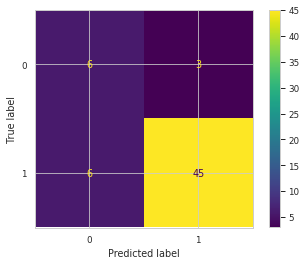

In [ ]:
# Parameter settings for Linear SVC Male Data: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
# Parameter settings for Linear SVC Female Data: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
linSVCMaleTest = SVC(C=0.1, gamma=1, kernel='linear')
linSVCMaleTest.fit(X_train_rfe_male, y_train_male)
malelinSVCpredTest =  linSVCMaleTest.predict(X_test_rfe_male)
print(classification_report(y_test_male, malelinSVCpredTest, target_names="01"))
print(matthews_corrcoef(y_test_male, malelinSVCpredTest))
ConfusionMatrixDisplay.from_estimator(
    linSVCMaleTest, X_test_rfe_male, y_test_male, display_labels="01", xticks_rotation="horizontal"
)

              precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.90      0.92      0.91        48

    accuracy                           0.84        57
   macro avg       0.70      0.68      0.69        57
weighted avg       0.84      0.84      0.84        57

0.3790876982878728


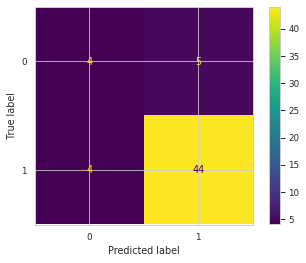

In [ ]:
linSVCFemaleTest = SVC(C=0.1, gamma=1, kernel='linear')
linSVCFemaleTest.fit(X_train_rfe_female, y_train_female)
femalelinSVCpredTest =  linSVCFemaleTest.predict(X_test_rfe_female)
print(classification_report(y_test_female, femalelinSVCpredTest, target_names="01"))
print(matthews_corrcoef(y_test_female, femalelinSVCpredTest))
ConfusionMatrixDisplay.from_estimator(
    linSVCFemaleTest, X_test_rfe_female, y_test_female, display_labels="01", xticks_rotation="horizontal"
)

**Supprt Vector Machine - RBF Kernel**

In [ ]:
from sklearn.svm import SVC
#gamma = 0.0001, C=1.0, random_state=None, tol=1e-8 parameters from paper
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

rbfSVCMaleTest = SVC()
rbfSVCFemaleTest = SVC()

clfMale = GridSearchCV(rbfSVCMaleTest, param_grid)
clfMale.fit(X_train_rfe_male, y_train_male)
#rfc_results_male = pd.DataFrame(clfMale.cv_results_)
print("Parameter settings for RBF SVC Male Data: %s" % clfMale.best_params_)

clfFemale = GridSearchCV(rbfSVCFemaleTest, param_grid)
clfFemale.fit(X_train_rfe_female, y_train_female)
#rfc_results_female = pd.DataFrame(clfFemale.cv_results_)
print("Parameter settings for RBF SVC Female Data: %s" % clfFemale.best_params_)

Parameter settings for RBF SVC Male Data: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Parameter settings for RBF SVC Female Data: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.33      0.33      0.33         9
           1       0.88      0.88      0.88        51

    accuracy                           0.80        60
   macro avg       0.61      0.61      0.61        60
weighted avg       0.80      0.80      0.80        60

0.21568627450980393


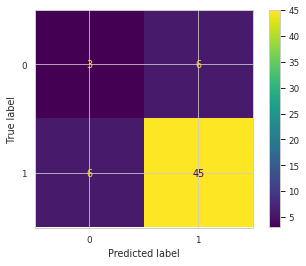

In [ ]:
# Parameter settings for RBF SVC Male Data: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
# Parameter settings for RBF SVC Female Data: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
rbfSVCMaleTest = SVC(C=1, gamma=0.01, kernel='rbf')
rbfSVCMaleTest.fit(X_train_rfe_male, y_train_male)
malerbfSVCpredTest =  rbfSVCMaleTest.predict(X_test_rfe_male)
print(classification_report(y_test_male, malerbfSVCpredTest, target_names="01"))
print(matthews_corrcoef(y_test_male, malerbfSVCpredTest))
ConfusionMatrixDisplay.from_estimator(
    rbfSVCMaleTest, X_test_rfe_male, y_test_male, display_labels="01", xticks_rotation="horizontal"
)

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.90      0.98      0.94        48

    accuracy                           0.89        57
   macro avg       0.85      0.71      0.76        57
weighted avg       0.89      0.89      0.88        57

0.5460375914550676


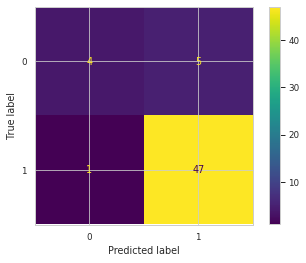

In [ ]:
rbfSVCFemaleTest = SVC(C=10, gamma=0.0001, kernel='rbf')
rbfSVCFemaleTest.fit(X_train_rfe_female, y_train_female)
femalerbfSVCpredTest =  rbfSVCFemaleTest.predict(X_test_rfe_female)
print(classification_report(y_test_female, femalerbfSVCpredTest, target_names="01"))
print(matthews_corrcoef(y_test_female, femalerbfSVCpredTest))
ConfusionMatrixDisplay.from_estimator(
    rbfSVCFemaleTest, X_test_rfe_female, y_test_female, display_labels="01", xticks_rotation="horizontal"
)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
#solver='lbfgs', multi_class='multinomial' parameters from paper
param_grid = {'penalty' : ['l2'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    'multi_class' : ['auto', 'ovr', 'multinomial'],
    'max_iter' : [1000]
    }

linRegMaleTest = LogisticRegression()
linRegFemaleTest = LogisticRegression()

clfMale = GridSearchCV(linRegMaleTest, param_grid)
clfMale.fit(X_train_rfe_male, y_train_male)
#rfc_results_male = pd.DataFrame(clfMale.cv_results_)
print("Parameter settings for Linear Regression Male Data: %s" % clfMale.best_params_)

clfFemale = GridSearchCV(linRegFemaleTest, param_grid)
clfFemale.fit(X_train_rfe_female, y_train_female)
#rfc_results_female = pd.DataFrame(clfFemale.cv_results_)
print("Parameter settings for Linear Regression Female Data: %s" % clfFemale.best_params_)

#liblinear & multinomial wont work with each other
param_grid = {'penalty' : ['l2'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'multi_class' : ['auto', 'ovr'],
    'max_iter' : [1000]
    }

linRegMaleTest = LogisticRegression()
linRegFemaleTest = LogisticRegression()

clfMale = GridSearchCV(linRegMaleTest, param_grid)
clfMale.fit(X_train_rfe_male, y_train_male)
#rfc_results_male = pd.DataFrame(clfMale.cv_results_)
print("Parameter settings for Linear Regression Male Data: %s" % clfMale.best_params_)

clfFemale = GridSearchCV(linRegFemaleTest, param_grid)
clfFemale.fit(X_train_rfe_female, y_train_female)
#rfc_results_female = pd.DataFrame(clfFemale.cv_results_)
print("Parameter settings for Linear Regression Female Data: %s" % clfFemale.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

Parameter settings for Linear Regression Male Data: {'C': 1.0, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

Parameter settings for Linear Regression Female Data: {'C': 0.01, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

Parameter settings for Linear Regression Male Data: {'C': 1.0, 'max_iter': 1000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'sag'}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

Parameter settings for Linear Regression Female Data: {'C': 0.01, 'max_iter': 1000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
#Parameter settings for Linear Regression Male Data: {'C': 0.01, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
#Parameter settings for Linear Regression Male Data: {'C': 1.0, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'} balanced
#Parameter settings for Linear Regression Female Data: {'C': 0.01, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
#Parameter settings for Linear Regression Male Data: {'C': 0.1, 'max_iter': 1000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
#Parameter settings for Linear Regression Male Data: {'C': 1.0, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'} balanced
#Parameter settings for Linear Regression Female Data: {'C': 0.01, 'max_iter': 1000, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
param_grid = {'penalty' : ['l2'],
    'C' : [0.1, 0.01, 1.0],
    'solver' : ['lbfgs','sag'],
    'multi_class' : ['auto', 'multinomial'],
    'max_iter' : [1000]
    }

linRegMaleTest = LogisticRegression()
linRegFemaleTest = LogisticRegression()

clfMale = GridSearchCV(linRegMaleTest, param_grid)
clfMale.fit(X_train_rfe_male, y_train_male)
#rfc_results_male = pd.DataFrame(clfMale.cv_results_)
print("Parameter settings for Linear Regression Male Data: %s" % clfMale.best_params_)

clfFemale = GridSearchCV(linRegFemaleTest, param_grid)
clfFemale.fit(X_train_rfe_female, y_train_female)
#rfc_results_female = pd.DataFrame(clfFemale.cv_results_)
print("Parameter settings for Linear Regression Female Data: %s" % clfFemale.best_params_)

Parameter settings for Linear Regression Male Data: {'C': 1.0, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}
Parameter settings for Linear Regression Female Data: {'C': 0.01, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}


              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.94      0.90      0.92        51

    accuracy                           0.87        60
   macro avg       0.74      0.78      0.76        60
weighted avg       0.88      0.87      0.87        60

0.5247346970015024


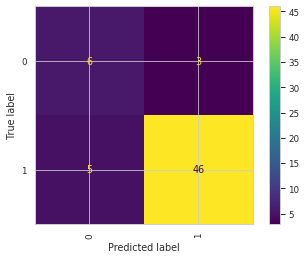

In [ ]:
#Parameter settings for Linear Regression Male Data: {'C': 1.0, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}
#Parameter settings for Linear Regression Female Data: {'C': 0.01, 'max_iter': 1000, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
from sklearn.linear_model import LogisticRegression

linRegMaleTest = LogisticRegression(C=1.0, max_iter=1000, multi_class='multinomial', penalty='l2', solver='sag')
linRegMaleTest.fit(X_train_rfe_male, y_train_male)
malelinRegpredTest =  linRegMaleTest.predict(X_test_rfe_male)
print(classification_report(y_test_male, malelinRegpredTest, target_names="01"))
print(matthews_corrcoef(y_test_male, malelinRegpredTest))
ConfusionMatrixDisplay.from_estimator(
    linRegMaleTest, X_test_rfe_male, y_test_male, display_labels="01", xticks_rotation="vertical"
)

              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.90      0.98      0.94        48

    accuracy                           0.89        57
   macro avg       0.85      0.71      0.76        57
weighted avg       0.89      0.89      0.88        57

0.5460375914550676


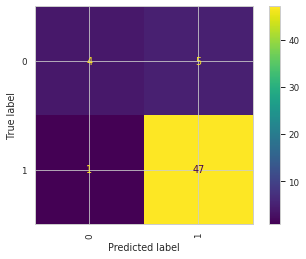

In [ ]:
linRegFemaleTest = LogisticRegression(C=0.01, max_iter=1000, multi_class='multinomial', penalty='l2', solver='lbfgs')
linRegFemaleTest.fit(X_train_rfe_female, y_train_female)
femalelinRegpredTest =  linRegFemaleTest.predict(X_test_rfe_female)
print(classification_report(y_test_female, femalelinRegpredTest, target_names="01"))
print(matthews_corrcoef(y_test_female, femalelinRegpredTest))
ConfusionMatrixDisplay.from_estimator(
    linRegFemaleTest, X_test_rfe_female, y_test_female, display_labels="01", xticks_rotation="vertical"
)